# Step1: Importing Libraries

In [1]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Step2: Reading Dataset and Understanding Data

In [2]:
bikeSharing_df = pd.read_csv("day.csv")

In [3]:
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#check the shape
bikeSharing_df.shape

(730, 16)

In [5]:
#check dataframe for null and datatype 
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### No null column

# Step3: Cleaning Data

In [6]:
#days_old variable which indicates how old is the business
bikeSharing_df['days_old'] = (pd.to_datetime(bikeSharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [7]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bikeSharing_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bikeSharing_df.drop(['casual'], axis = 1, inplace = True)
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)

In [8]:
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


### Handle Missing values

In [9]:
#Print null counts by column
bikeSharing_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

#### no missing values

In [10]:
#Print number of unique values in all columns
bikeSharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

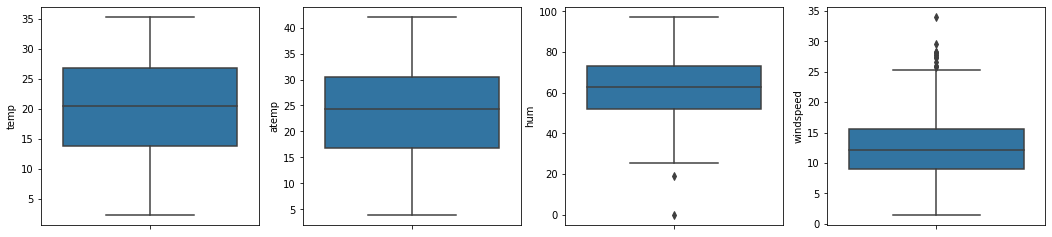

In [11]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

# 4. EDA

## 4.1 Convert season and weathersit to categorical types

In [12]:
bikeSharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikeSharing_df.mnth = bikeSharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeSharing_df.weekday = bikeSharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


## 4.2 Draw pair Plots to check the linear relationship

<Figure size 1080x2160 with 0 Axes>

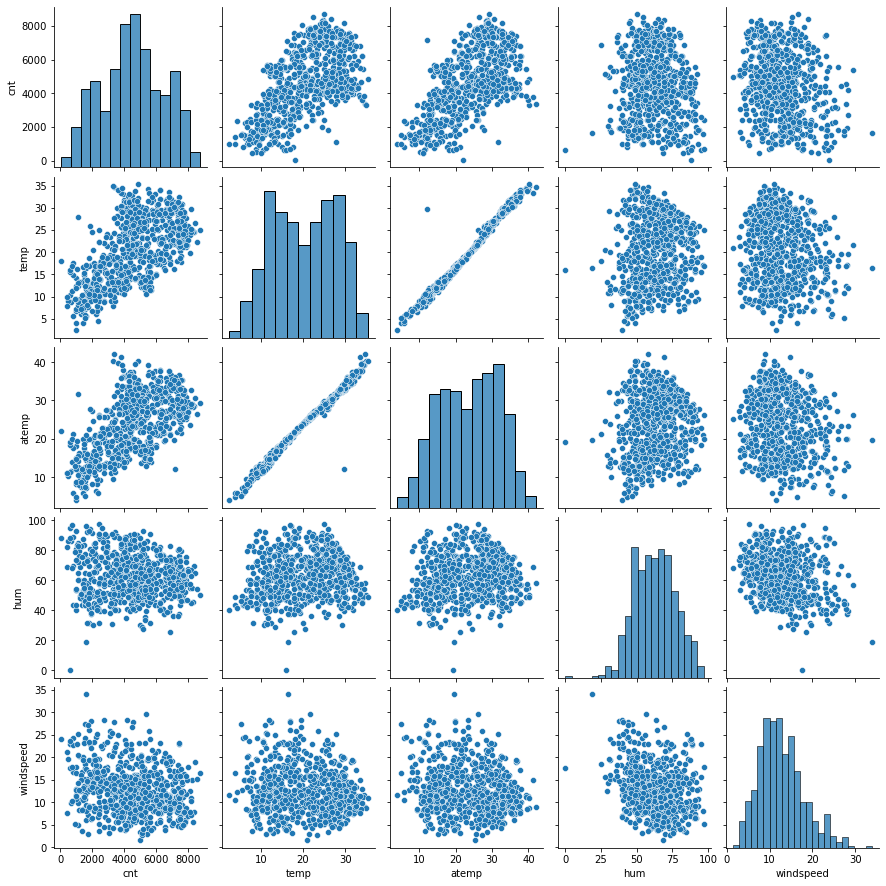

In [13]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

* Looks like the temp and atemp has the highest corelation with the target variable cnt
* temp and atemp are highly co-related with each other

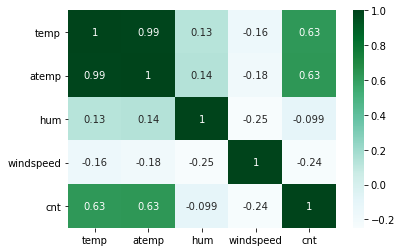

In [14]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

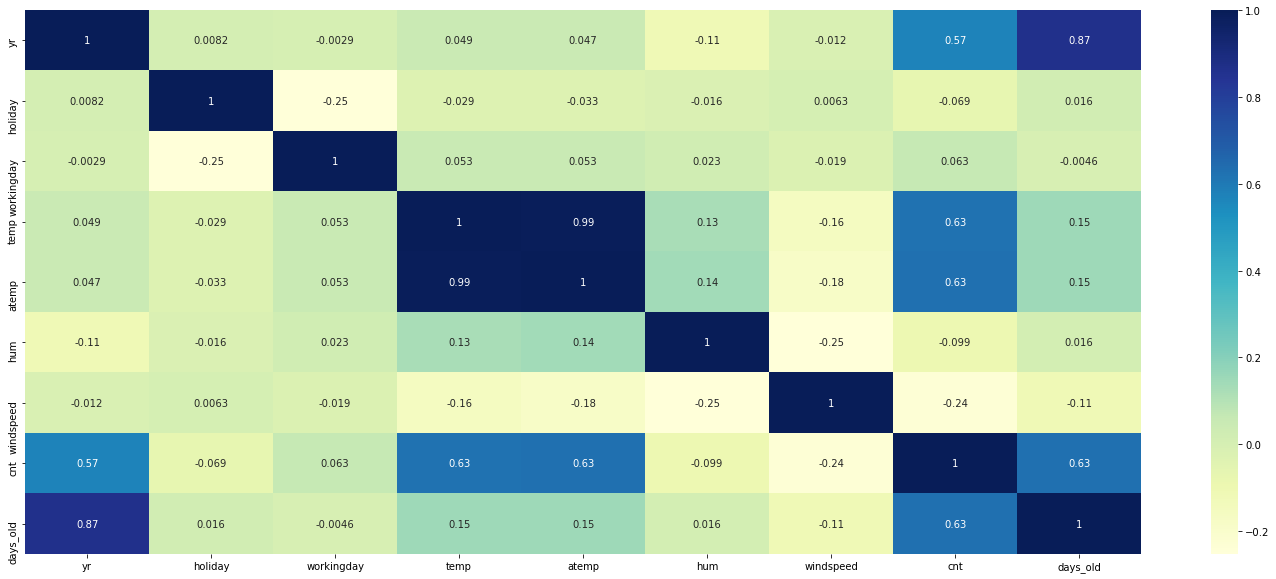

In [15]:
#Calculate Correlation
corr = bikeSharing_df.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model


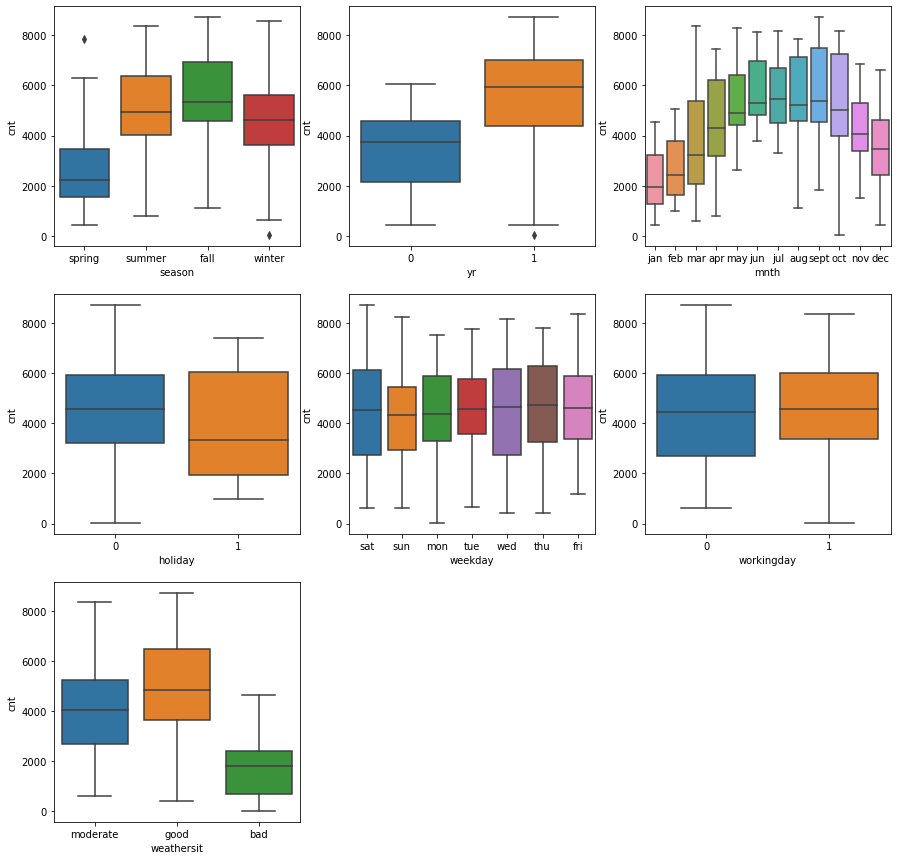

In [16]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.show()

1. Season: 3:fall has highest demand for rental bikes
2. I see that demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathersit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

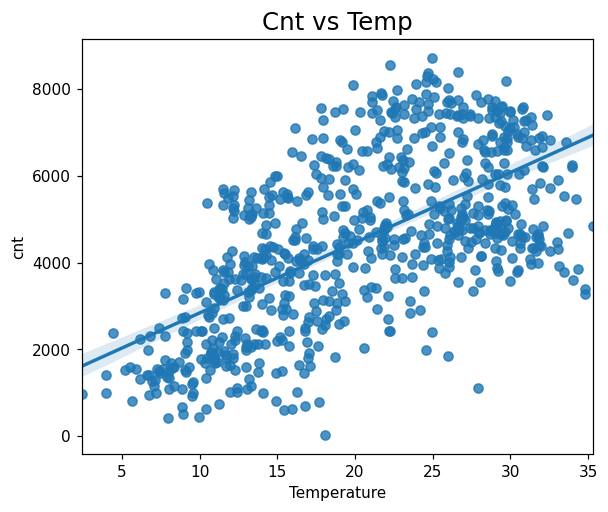

In [17]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()


- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

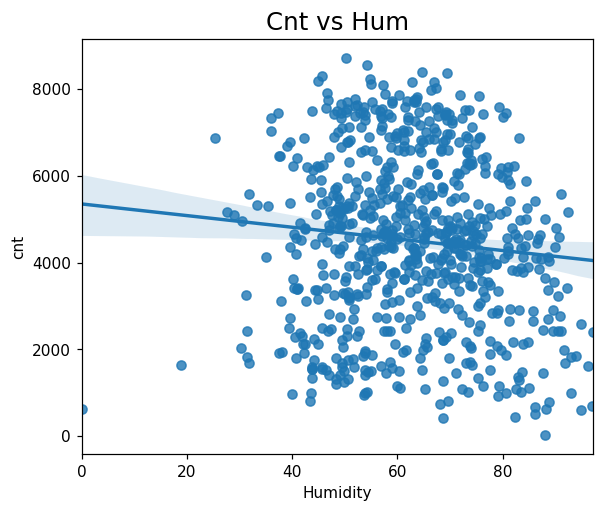

In [18]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

- Hum is values are more scattered around.
- Although we can see cnt decreasing with increase in humidity.

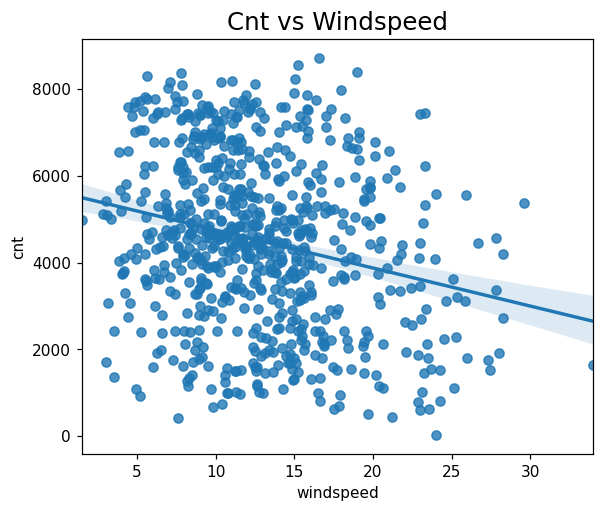

In [19]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="windspeed")
plt.show()

- Windspeed is values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

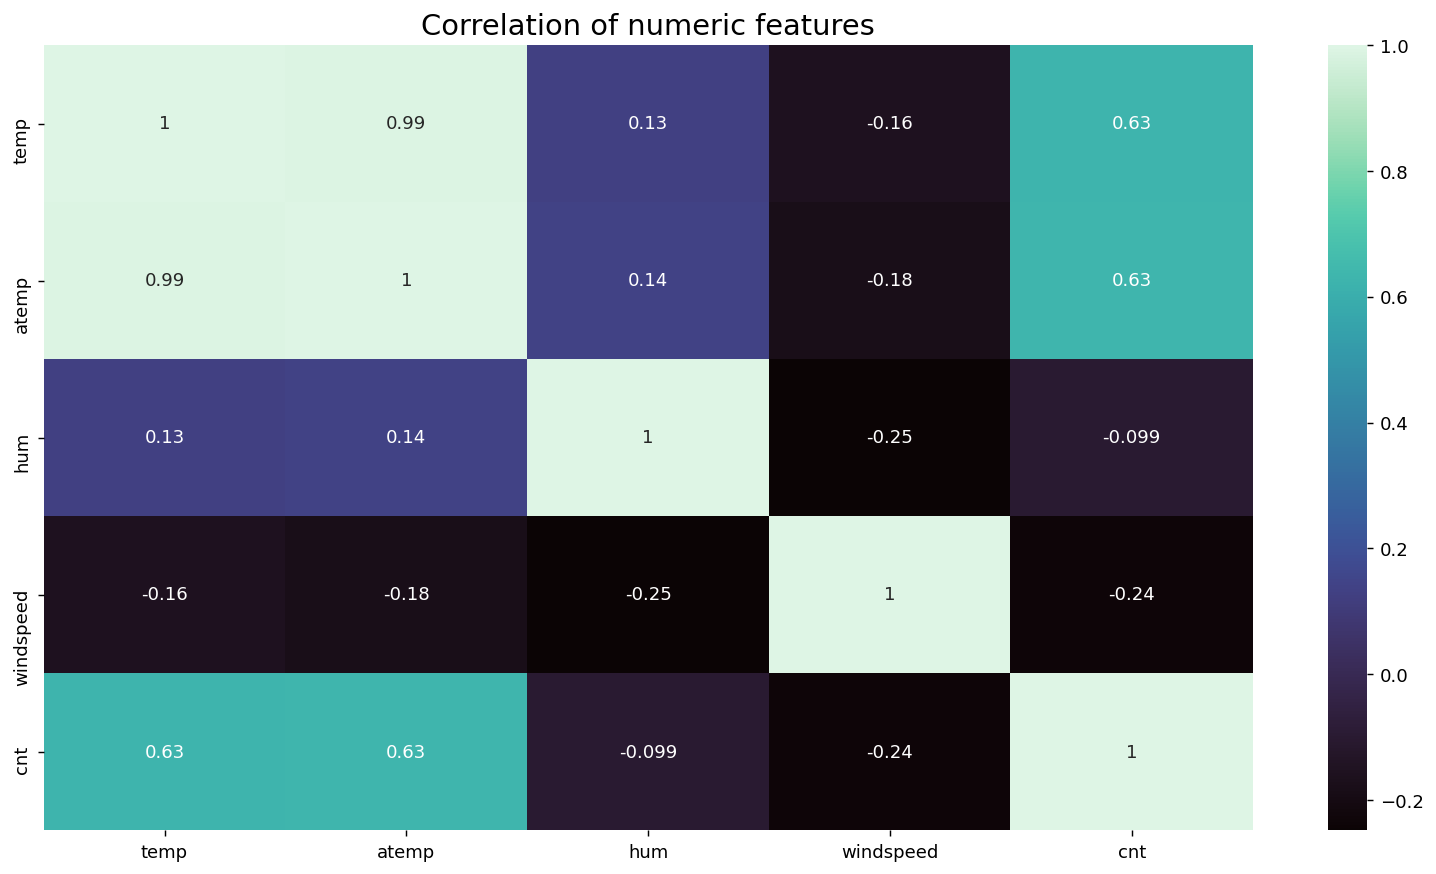

In [20]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bikeSharing_df[num_features].corr(),annot= True,cmap="mako")
plt.show()

- Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
- Temp and Atemp also have high correlation with cnt variable.
- hum and windspeed has negative correlation

# 5. Data Preparation for Linear Regression

In [21]:
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["season","mnth","weekday"],drop_first=True)
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["weathersit"])
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,1,0,1,0


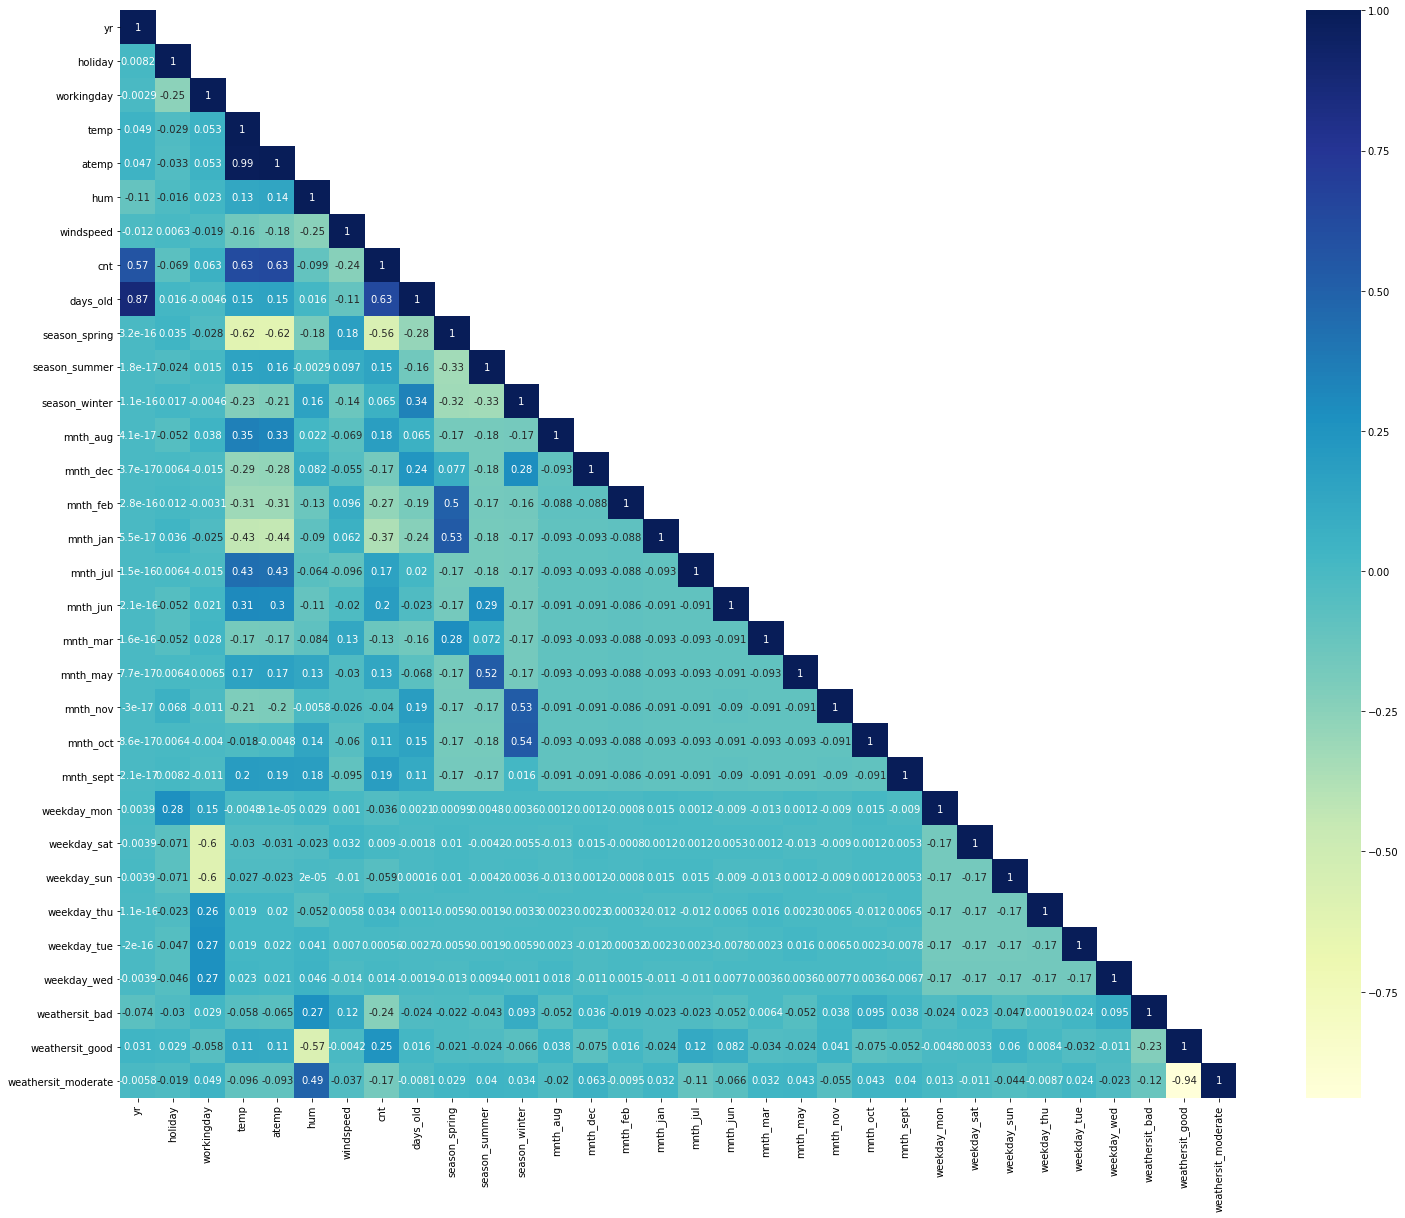

In [22]:
#Now we can plot correlation matrix for bb_train data
mask=np.array(bikeSharing_df.corr())
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize = (25, 20))
sns.heatmap(bikeSharing_df.corr(), mask=mask, annot = True, cmap="YlGnBu")
plt.show()

# 6. Model Building

### Split Data into training and test

In [23]:
bikeSharing_df.shape

(730, 32)

In [24]:
#y to contain only target variable
y=bikeSharing_df.pop('cnt')

#X is all remainign variable also our independent variables
X=bikeSharing_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [25]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,1,0,1,0


In [26]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


In [27]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [28]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [29]:
X_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.896978,0,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,1,...,0,0,1,0,0,0,0,0,0,1


### Build a Model using RFE and Automated approach

In [30]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [32]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', False, 16),
 ('mnth_feb', False, 5),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 9),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 17),
 ('mnth_oct', False, 4),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 11),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 10),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 12),
 ('weekday_wed', False, 14),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

### Function to build a model using statsmodel api

In [33]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [34]:
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [35]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [36]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_summer', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [37]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [38]:
X_train_rfe.shape


(511, 13)

### Model 1 - Start with all variables selected by RFE

In [39]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.69e-182
Time:                        02:01:12   Log-Likelihood:                -4143.3
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1027.2371    

#### All the columns has < 0.05 p-value, but 

### Model 2

In [40]:
# removing holiday as it has negetive value
cols = ['yr', 'workingday', 'temp', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.80e-183
Time:                        02:01:12   Log-Likelihood:                -4146.5
No. Observations:                 511   AIC:                             8317.
Df Residuals:                     499   BIC:                             8368.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 873.4348    

### Model 3

removing temp as high VIF

In [41]:
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     149.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.70e-150
Time:                        02:01:12   Log-Likelihood:                -4223.7
No. Observations:                 511   AIC:                             8471.
Df Residuals:                     499   BIC:                             8522.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4653.6612    

### Model 4

In [42]:
# removing mnth_jul as it has > 0.05 p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     165.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.23e-151
Time:                        02:01:12   Log-Likelihood:                -4223.8
No. Observations:                 511   AIC:                             8470.
Df Residuals:                     500   BIC:                             8516.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4623.1969    

### Model 5

In [43]:
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate', 'temp']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.10e-179
Time:                        02:01:12   Log-Likelihood:                -4161.3
No. Observations:                 511   AIC:                             8343.
Df Residuals:                     501   BIC:                             8385.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1660.8998    

Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.768. Let us above Model as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [44]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [45]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate', 'temp']
#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1660.8997593443369 [ 2038.34397767  -998.07658799  -598.21089714   449.91767989
   532.98444939   167.94223942 -2578.33645191  -668.93930371
  4106.30337407]


# Step 7 

## Evaluation 

In [46]:
y_train_pred = lr.predict(X_train[cols])

In [47]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8179667013256823

In [48]:
# transform test data
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [49]:
#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [50]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8102617142318076

### r2 score for train and test is almost same


-
-
-
-
-
-

-
-
-
-
-
-


# Questions

1. From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable? (3 marks)

        - Season: 3:fall has highest demand for rental bikes
        - I see that demand for next year has grown
        - Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
        - When there is a holiday, demand has decreased.
        - Weekday is not giving clear picture abount demand.
        - The clear weathersit has highest demand
        - During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.




2. Why is it important to use drop_first=True during dummy variable creation? (2 mark)

        - It delets the extra column. for an example, if you have one column with 3 types of variable, a,b,c. We can avoid creating a. if b and c both are false, its obvious its 'a'. 


3. Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable? (1 mark)

        - 'temp' variable has the highest (0.63) correlation with target variable 'cnt'.
        
        
4. How did you validate the assumptions of Linear Regression after building the model on the training set? (3 marks)

        - there are couple of parameters like VIF, p-values and r2 value comparison between train and test data.
        
5. Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes? (2 marks)

        - tmp
        - season_spring
        - days_old